In [1]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
train = pd.read_csv('trainmovie.csv')
test = pd.read_csv('testmovie.csv')

In [3]:
train.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,departments_Art,departments_Crew,departments_Writing,departments_Costume & Make-Up,departments_Camera,departments_Directing,departments_Editing,departments_Visual Effects,departments_Lighting,departments_Actors
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,12,4,2,13,8,4,2,4,4,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,1,0,1,1,1,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,5,9,1,5,4,3,6,3,1,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,1,0,0,1,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,1,0,0,1,0,0,0,0


/var/folders/4l/srn7gtws4zsbq_ndc7mwjs880000gn/T/ipykernel_45177/1044166348.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'Distribution of Revenue')

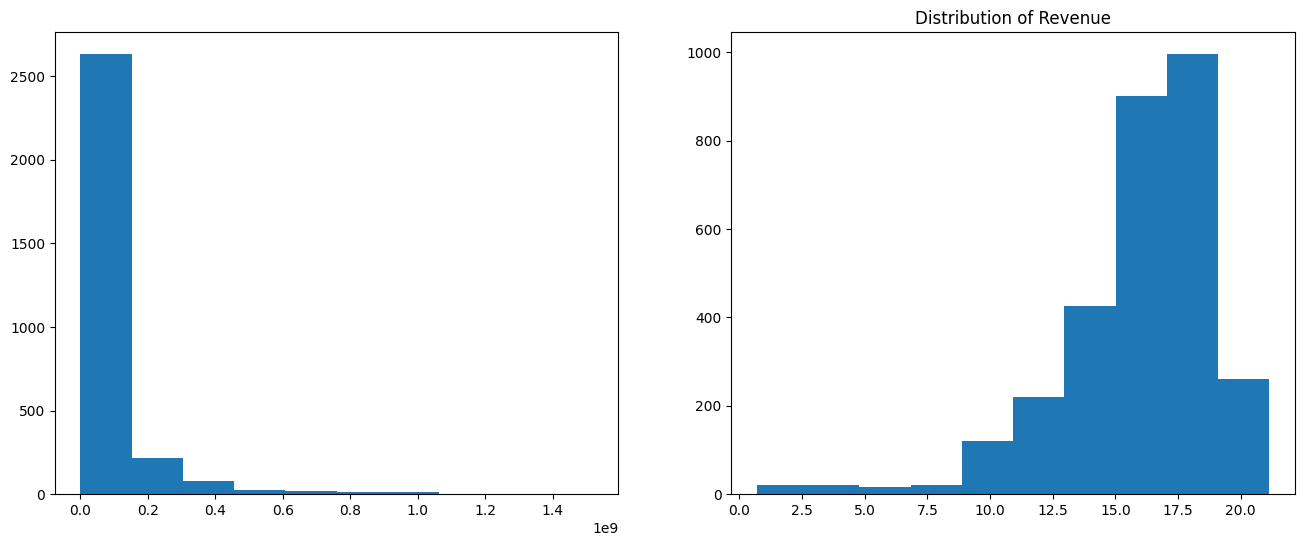

In [5]:
fig, ax = plt.subplots(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(train['revenue'])
plt.subplot(1,2,2)
plt.hist(np.log1p(train['revenue']))
plt.title("Distribution of Revenue")

In [7]:
train['homepage'].value_counts().head()

homepage
http://www.transformersmovie.com/               4
http://www.thehobbit.com/                       2
http://www.lordoftherings.net/                  2
http://sonyclassics.com/whiplash/               1
https://www.facebook.com/thefinesthoursmovie    1
Name: count, dtype: int64